# Génération artificiel de nombre suivant la loi de Benford
Ce notebook à pour objectif d'implémenter différentes manière de généré des données aléatoires suivants la loi de Benford.

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

import pybenford as ben

## Première version
### Fonction renvoyant le nombre maximum de nombre par digit

In [2]:
def get_distibution_numbers(freq_theo, n):
    """Number of numbers per digit.
    
    Function to return the number of numbers per digit for
    generating Benford's law numbers.
    
    Parameters
    ¯¯¯¯¯¯¯¯¯¯
    freq_obs : array
        Array of observed frequency.
    n : int
        Number of numbers for genérating
        Benford's law numbers.

    Return
    ¯¯¯¯¯¯
    numbers : array of int
        Array of maximal number per digit.
        
    Example
    ¯¯¯¯¯¯¯
    get_distibution_numbers(ben.get_theoretical_freq_benford(), 500)
    array([151,  88,  62,  48,  40,  33,  29,  26,  23])
    
    """
    numbers = freq_theo * n
    for i in range(len(numbers)):
        if int(str(numbers[i])[str(numbers[i]).find(".")+1]) >= 5:
            numbers[i] = int(numbers[i]) + 1
        else:
            numbers[i] = int(numbers[i])
    return numbers.astype(int)

### Fonction générant un ensemble de nombres qui suit la loi de Benford pour le $1^{er}$ digit

In [3]:
def get_ramdom_benford(freq_obs, n, a, b):
    """Generate random numbers according to Benford's law.
    
    Function to return a random set of numbers accordind to
    the Benford's law for the first digit.
    
    Parameters
    ¯¯¯¯¯¯¯¯¯¯
    freq_theo : array
        Array of observed frequency.
    n : int
        Number of numbers for genérating
        Benford's law numbers.
    a : int
        minimum.
    b : int
        maximum.

    Return
    ¯¯¯¯¯¯
    random_benford : array of int
        Numbers according to the Benford's law
        for the first digit.
    
    """
    random_benford = []
    max_numbers = get_distibution_numbers(freq_theo, n)
    nb_numbers = np.zeros(len(max_numbers), dtype=int)

    while sum(nb_numbers) != sum(max_numbers):
        nb = random.randint(a, b)
        nb_str = str(nb)
        if nb_numbers[int(nb_str[0])-1] == max_numbers[int(nb_str[0])-1]:
            continue
        nb_numbers[int(nb_str[0])-1] += 1
        random_benford.append(nb)

    return np.array(random_benford)

In [4]:
freq_theo = ben.get_theoretical_freq_benford()
n = 2000
a = 1
b = 100

In [5]:
%%time
rd_benford = get_ramdom_benford(freq_theo, n, a, b)
rd_benford

CPU times: user 52.2 ms, sys: 3 µs, total: 52.2 ms
Wall time: 51.8 ms


array([  2,  75,  74, ..., 100,  10,   1])

### Vérification que l'ensemble de nombres généré aléatoirement suit la loi de Benford pour le premier digit

In [6]:
first_digit = ben.count_first_digit(rd_benford)
first_digit

array([602, 352, 250, 194, 158, 134, 116, 102,  92])

In [7]:
freq_frist_digit = ben.normalize_first_digit(first_digit)

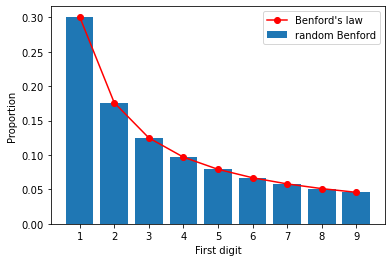

In [8]:
ben.build_hist_freq_ben(ben.normalize_first_digit(first_digit),
                        ben.get_theoretical_freq_benford(), 1,
                        legend="random Benford")

In [9]:
%%time
ben.calculate_bootstrap_chi2(rd_benford, ben.get_theoretical_freq_benford(), 1)

statistics : 4.0684729182817465 ; p-value : 0.8508933215120749
CPU times: user 3.44 s, sys: 3.13 ms, total: 3.44 s
Wall time: 3.44 s


(4.0684729182817465, 0.8508933215120749)

L'ensemble de nombre généré aléatoirement suit la loi de Benford pour le premier digit.

### Vérification que l'ensemble de nombres généré aléatoirement suit la loi de Benford pour les 2 premiers digits

In [10]:
first_digit = ben.count_first_digit(rd_benford, 2)
first_digit

array([103,  36,  47,  45,  49,  46,  66,  58,  43,  62,  33,  25,  38,
        36,  27,  36,  30,  32,  32,  30,  14,  28,  28,  18,  16,  18,
        25,  27,  28,  25,  19,  18,  15,  15,  17,  15,  15,  20,  21,
        23,  16,  12,  10,  16,  16,  17,  15,  14,  15,  15,  10,  16,
         9,  12,  13,  13,  11,  18,  11,  11,  10,   7,   8,  17,  14,
         9,   9,  13,   9,   9,  11,  10,  11,   9,  13,  11,   8,   6,
         8,   9,  13,   7,   9,  11,   9,   7,   6,   5,   6,  10])

In [11]:
freq_frist_digit = ben.normalize_first_digit(first_digit)
freq_frist_digit

array([0.05619203, 0.01963993, 0.02564103, 0.02454992, 0.02673213,
       0.02509547, 0.03600655, 0.03164212, 0.02345881, 0.03382433,
       0.01800327, 0.01363884, 0.02073104, 0.01963993, 0.01472995,
       0.01963993, 0.01636661, 0.01745772, 0.01745772, 0.01636661,
       0.00763775, 0.0152755 , 0.0152755 , 0.00981997, 0.00872886,
       0.00981997, 0.01363884, 0.01472995, 0.0152755 , 0.01363884,
       0.01036552, 0.00981997, 0.00818331, 0.00818331, 0.00927441,
       0.00818331, 0.00818331, 0.01091107, 0.01145663, 0.01254774,
       0.00872886, 0.00654664, 0.00545554, 0.00872886, 0.00872886,
       0.00927441, 0.00818331, 0.00763775, 0.00818331, 0.00818331,
       0.00545554, 0.00872886, 0.00490998, 0.00654664, 0.0070922 ,
       0.0070922 , 0.00600109, 0.00981997, 0.00600109, 0.00600109,
       0.00545554, 0.00381888, 0.00436443, 0.00927441, 0.00763775,
       0.00490998, 0.00490998, 0.0070922 , 0.00490998, 0.00490998,
       0.00600109, 0.00545554, 0.00600109, 0.00490998, 0.00709

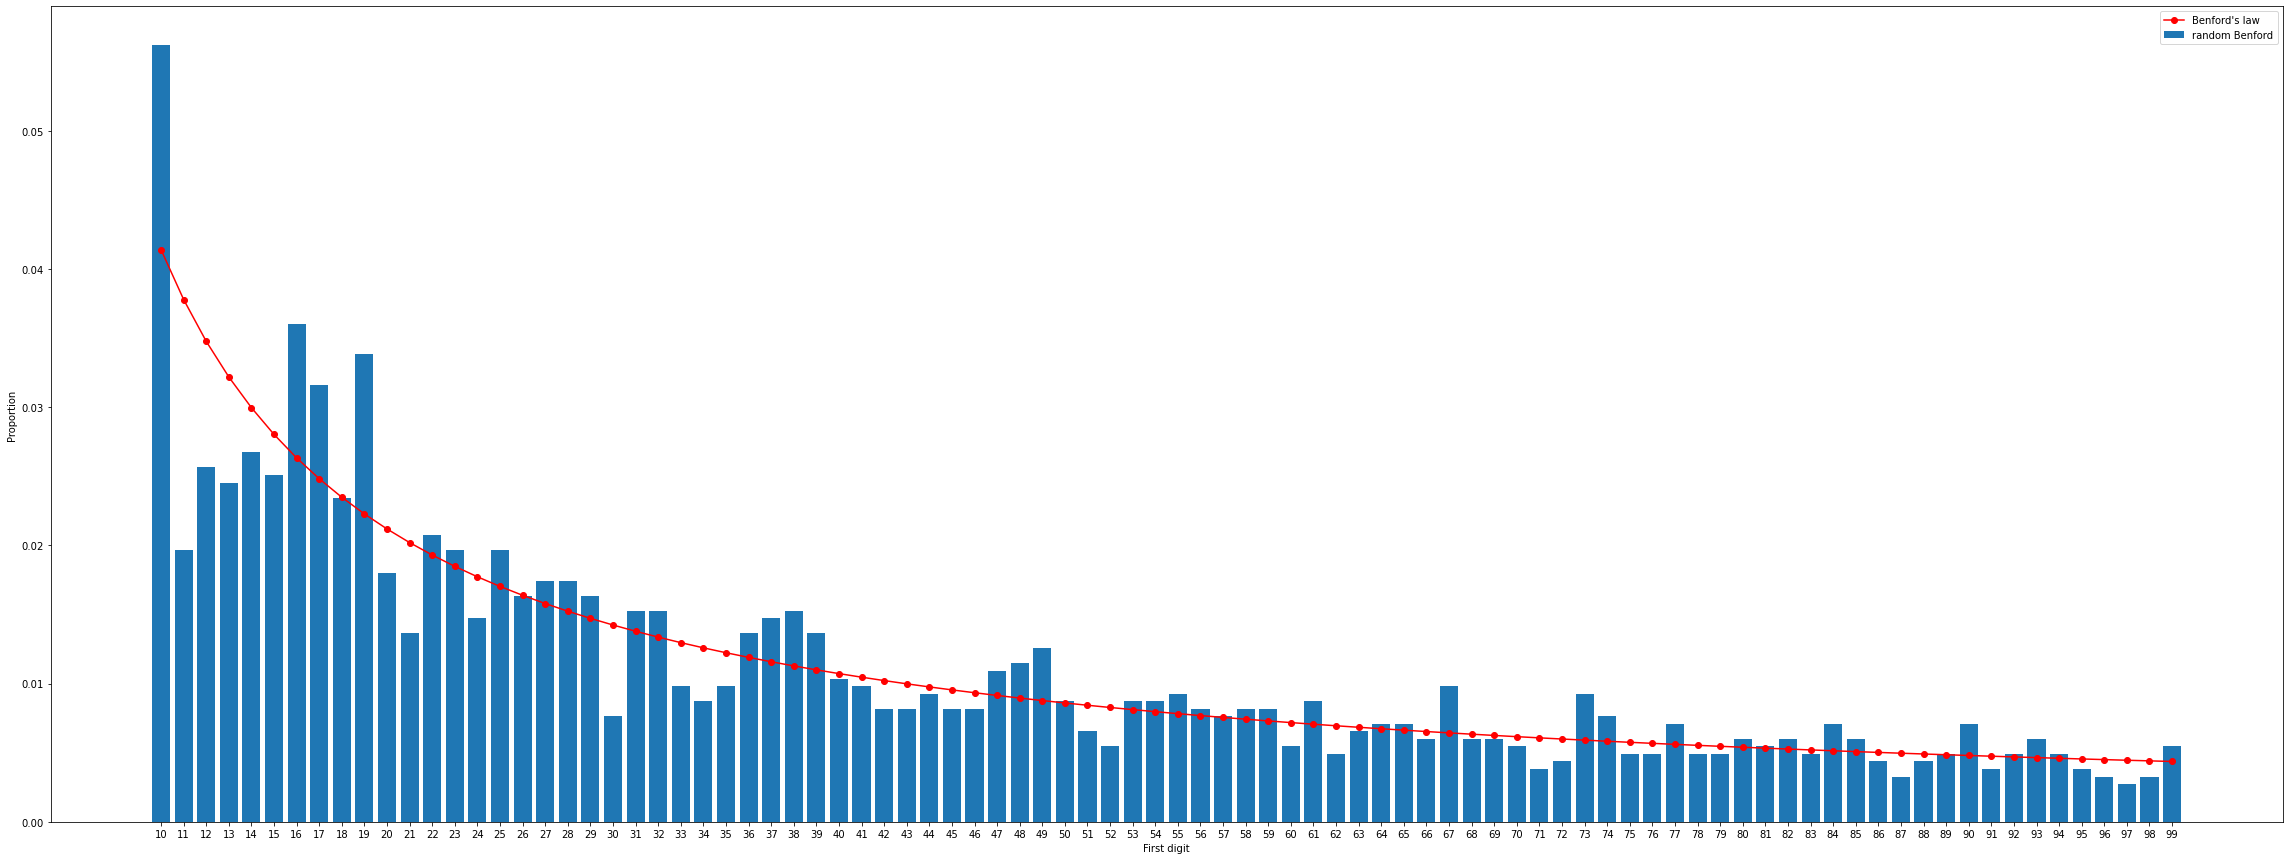

In [12]:
ben.build_hist_freq_ben(ben.normalize_first_digit(first_digit),
                        ben.get_theoretical_freq_benford(2), 2,
                        legend="random Benford", size=(40, 15))

In [13]:
%%time
ben.calculate_bootstrap_chi2(rd_benford, ben.get_theoretical_freq_benford(2), 2)

statistics : 100.37783945366495 ; p-value : 0.19257706249824919
CPU times: user 3.52 s, sys: 0 ns, total: 3.52 s
Wall time: 3.51 s


(100.37783945366495, 0.19257706249824919)

Visuellement l'ensembe de nombre généré ne semble pas suivre la loi de Benford. Dans certains cas le test statistique est non significatif, alors que visuellement cela ne semble pas suivre la loi de benford. Cela dépend de l'ensemble de nombre généré aléatoirement.

En conclusion, on peut générer un ensemble de nombre qui sui la loi de Benford pour le premier digit mais pas pour les é premiers ou les n premiers digits avec cette méthode.

## Avec l'utilisation d'une distribution d'une loi log-normal

In [14]:
test = np.random.lognormal(mean=5, sigma=5, size=1000)

In [15]:
np.mean(test)

50232799.47250624

In [16]:
np.var(test)

1.2231984246976015e+18

In [17]:
np.median(test)

167.3629295174544

In [18]:
print(len(test)); print(min(test)); print(max(test)); ben.calculate_oom(test)

1000
6.504422272873505e-06
32784023939.859722
POM : 5040266846847336.0
OOM : 15.70245352990693


15.70245352990693

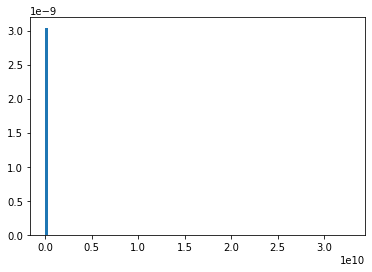

In [19]:
plt.hist(test, bins=100, density=True);
#plt.xlim((0,0.5e12));

In [20]:
d_obs = ben.count_first_digit(test)
print(d_obs)
f_obs = ben.normalize_first_digit(d_obs)
print(f_obs)
print(sum(d_obs))

[281 132 114  71  67  53  42  52  36]
[0.33136792 0.15566038 0.13443396 0.08372642 0.07900943 0.0625
 0.0495283  0.06132075 0.04245283]
848


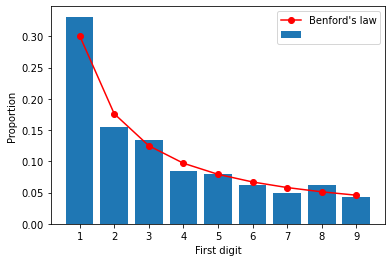

In [21]:
ben.build_hist_freq_ben(f_obs, ben.get_theoretical_freq_benford(), 1)

In [22]:
ben.chi2_test(test, ben.get_theoretical_freq_benford())

statistics : 31.541946549223464 ; p-value : 0.00011247777756646204


(31.541946549223464, 0.00011247777756646204)

In [23]:
ben.calculate_bootstrap_chi2(test, ben.get_theoretical_freq_benford(1), 1)

statistics : 31.54194654922326 ; p-value : 0.0001124777775664715


(31.54194654922326, 0.0001124777775664715)

In [24]:
d_obs = ben.count_first_digit(test, 2)
f_obs = ben.normalize_first_digit(d_obs)
print(sum(d_obs))

707


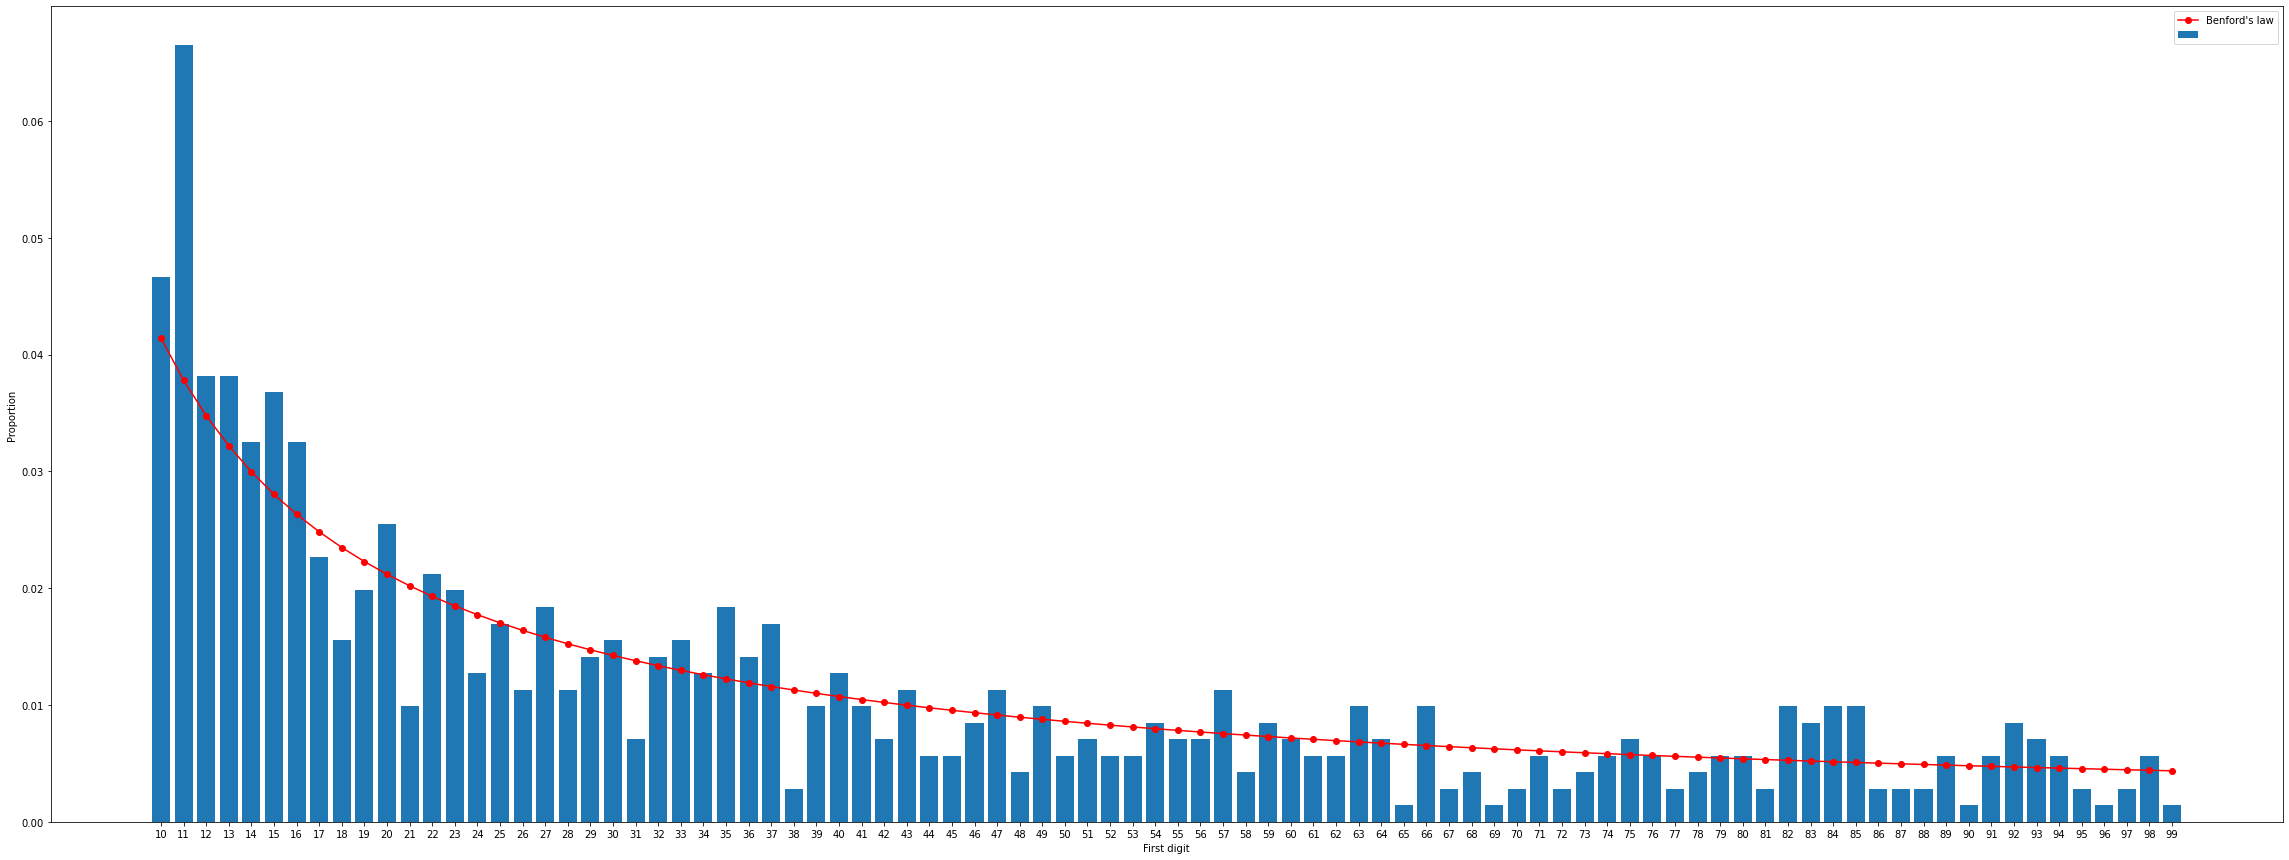

In [25]:
ben.build_hist_freq_ben(f_obs, ben.get_theoretical_freq_benford(2), 2,  size=(40, 15))

In [26]:
ben.chi2_test(test, ben.get_theoretical_freq_benford(2), 2)

statistics : 148.54100829989008 ; p-value : 7.746328907303957e-05


(148.54100829989008, 7.746328907303957e-05)

In [27]:
ben.calculate_bootstrap_chi2(test, ben.get_theoretical_freq_benford(2), 2)

statistics : 148.54100829988846 ; p-value : 7.746328907306459e-05


(148.54100829988846, 7.746328907306459e-05)

In [28]:
# second test

In [29]:
test = np.random.lognormal(mean=5, sigma=2, size=10000)

In [30]:
np.mean(test)

1073.2139926271122

In [31]:
np.var(test)

39491531.9059197

In [32]:
np.median(test)

146.55081672553894

In [33]:
print(len(test)); print(min(test)); print(max(test)); ben.calculate_oom(test)

10000
0.08289770262691183
417595.1414737038
POM : 5037475.445527438
OOM : 6.70221294224635


6.70221294224635

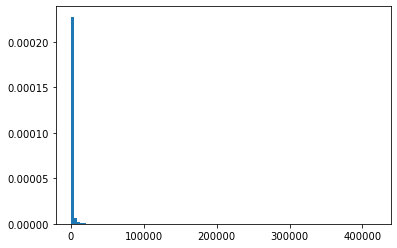

In [34]:
plt.hist(test, bins=100, density=True);
#plt.xlim((0,0.5e12));

In [35]:
d_obs = ben.count_first_digit(test)
print(d_obs)
f_obs = ben.normalize_first_digit(d_obs)
print(f_obs)
print(sum(d_obs))

[3022 1721 1253  988  753  678  586  489  433]
[0.304545   0.17343545 0.1262723  0.09956666 0.07588431 0.06832611
 0.05905472 0.04927945 0.043636  ]
9923


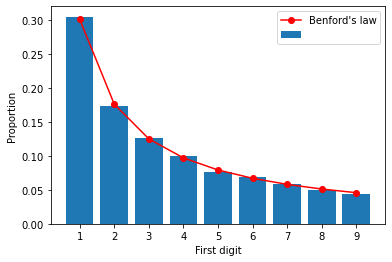

In [36]:
ben.build_hist_freq_ben(f_obs, ben.get_theoretical_freq_benford(), 1)

In [37]:
ben.chi2_test(test, ben.get_theoretical_freq_benford())

statistics : 5.71588919255856 ; p-value : 0.679021726208799


(5.71588919255856, 0.679021726208799)

In [38]:
ben.calculate_bootstrap_chi2(test, ben.get_theoretical_freq_benford(1), 1)

statistics : 7.772837794419484 ; p-value : 0.45596887988940893


(7.772837794419484, 0.45596887988940893)

In [39]:
d_obs = ben.count_first_digit(test, 2)
f_obs = ben.normalize_first_digit(d_obs)
print(sum(d_obs))

9099


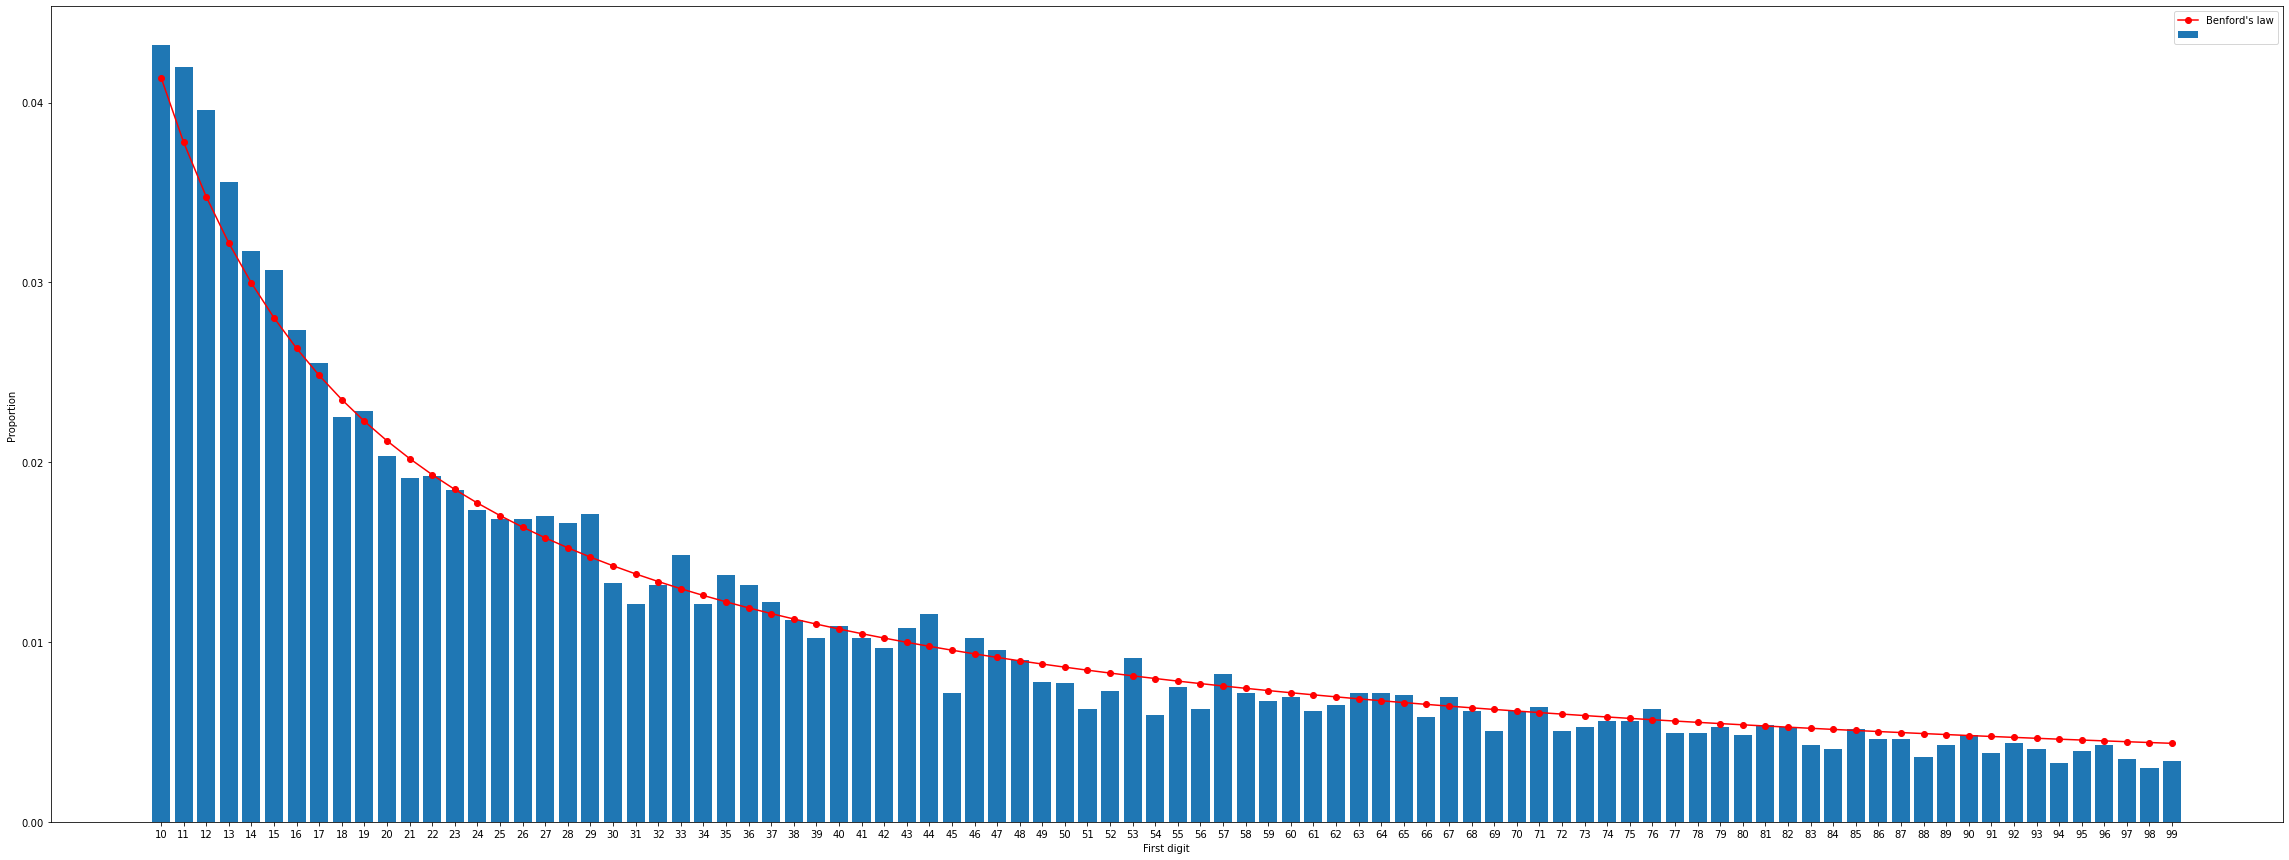

In [40]:
ben.build_hist_freq_ben(f_obs, ben.get_theoretical_freq_benford(2), 2,  size=(40, 15))

In [41]:
ben.chi2_test(test, ben.get_theoretical_freq_benford(2), 2)

statistics : 166.62056727741293 ; p-value : 1.1954132724495302e-06


(166.62056727741293, 1.1954132724495302e-06)

In [42]:
ben.calculate_bootstrap_chi2(test, ben.get_theoretical_freq_benford(2), 2)

statistics : 86.80775044827897 ; p-value : 0.546009787108712


(86.80775044827897, 0.546009787108712)